In [7]:
from pathlib import Path
import os
import re

In [5]:
folder_name = Path("logs/ue_abssum_logs")

def name(beams, penalty):
    return f"sq_en_single_large_ft_diverse_{beams}_{penalty}.log"

In [6]:

print(content)

[2023-05-02 13:22:58,382][root][INFO] - Work dir: /beegfs/home/r.vashurin/codebases/ue_abssum/workdir/2023-05-02/42_wikidata_simplequestions_single_prefix_sp_rubq_en_single
[2023-05-02 13:23:10,343][root][INFO] - Cannot load consistency metrics: No module named 'ue_abssum.packages.summac.summac'
[2023-05-02 13:23:22,990][root][INFO] - output_dir: ./workdir/
[2023-05-02 13:23:22,991][root][INFO] - generation_configs_path: /beegfs/ue_abssum/configs/generation
[2023-05-02 13:23:22,991][root][INFO] - seed: 42
[2023-05-02 13:23:22,991][root][INFO] - cache_dir: ~/prefix_sp_rubq_en_single
[2023-05-02 13:23:22,992][root][INFO] - offline_mode: False
[2023-05-02 13:23:22,992][root][INFO] - resolve_sequences: True
[2023-05-02 13:23:22,992][root][INFO] - model_seeds: [42]
[2023-05-02 13:23:22,992][root][INFO] - model
[2023-05-02 13:23:22,993][root][INFO] - 	name: google/t5-large-ssm-nq
[2023-05-02 13:23:22,993][root][INFO] - 	path: /trinity/home/r.vashurin/t5_large_wdsq_44/checkpoint-18064
[2023-0

In [17]:
# print(re.findall(r'Top 1 Acc: ()', content))

# re.findall(r'Top 1 Acc prr .+\: (-?\d+\.\d+)\n', content)

beam_records ={
    2: {},
    5: {}
}

for beams in [2, 5]:
    for penalty in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
        with open(folder_name / name(beams, penalty), 'r') as f:
            content = f.read()
            beam_records[beams][penalty] = float(re.search(r'Top 1 Acc: (\d+\.\d+)\n', content).group(1))

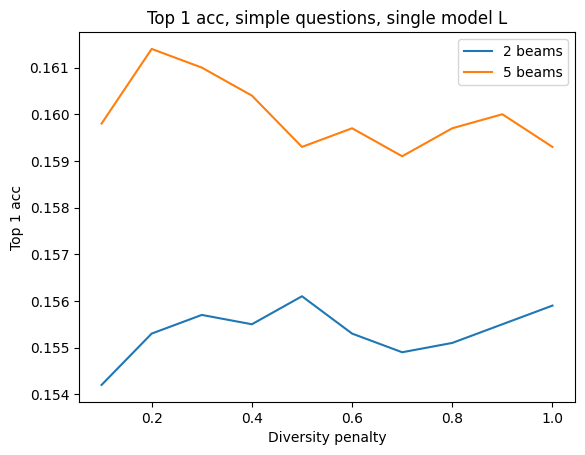

In [26]:
from matplotlib import pyplot as plt

beam_records


for beams in [2, 5]:
    records = beam_records[beams]
    plt.plot(records.keys(), records.values(), label=f"{beams} beams")

plt.legend()
plt.title('Top 1 acc, simple questions, single model L')
plt.xlabel("Diversity penalty")
plt.ylabel("Top 1 acc")

plt.savefig('top.jpg')
plt.show()